In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart_disease.csv")
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [3]:
df.isnull().sum()


,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [4]:
df.shape


(10000, 21)

In [5]:
df.duplicated().sum()


0

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9971.0,49.296259,18.193970,18.000000,34.000000,49.000000,65.000000,80.000000
Blood Pressure,9981.0,149.757740,17.572969,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol Level,9970.0,225.425577,43.575809,150.000000,187.000000,226.000000,263.000000,300.000000
BMI,9978.0,29.077269,6.307098,18.002837,23.658075,29.079492,34.520015,39.996954
Sleep Hours,9975.0,6.991329,1.753195,4.000605,5.449866,7.003252,8.531577,9.999952
Triglyceride Level,9974.0,250.734409,87.067226,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting Blood Sugar,9978.0,120.142213,23.584011,80.000000,99.000000,120.000000,141.000000,160.000000
CRP Level,9974.0,7.472201,4.340248,0.003647,3.674126,7.472164,11.255592,14.997087
Homocysteine Level,9980.0,12.456271,4.323426,5.000236,8.723334,12.409395,16.140564,19.999037


In [8]:
df.columns


Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [9]:
# Fill numerical columns with mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [10]:
# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [11]:
df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

print(df.head())

    Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
0  56.0       1           153.0              155.0                0        1   
1  69.0       0           146.0              286.0                0        0   
2  46.0       1           126.0              216.0                1        0   
3  32.0       0           122.0              293.0                0        1   
4  60.0       1           166.0              242.0                1        1   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  ...  \
0                     1         0  24.991591                    1  ...   
1                     1         1  25.221799                    0  ...   
2                     0         0  29.855447                    0  ...   
3                     1         0  24.130477                    1  ...   
4                     1         1  20.486289                    1  ...   

   High LDL Cholesterol  Alcohol Consumption  Stress Level  Sleep Hours  \

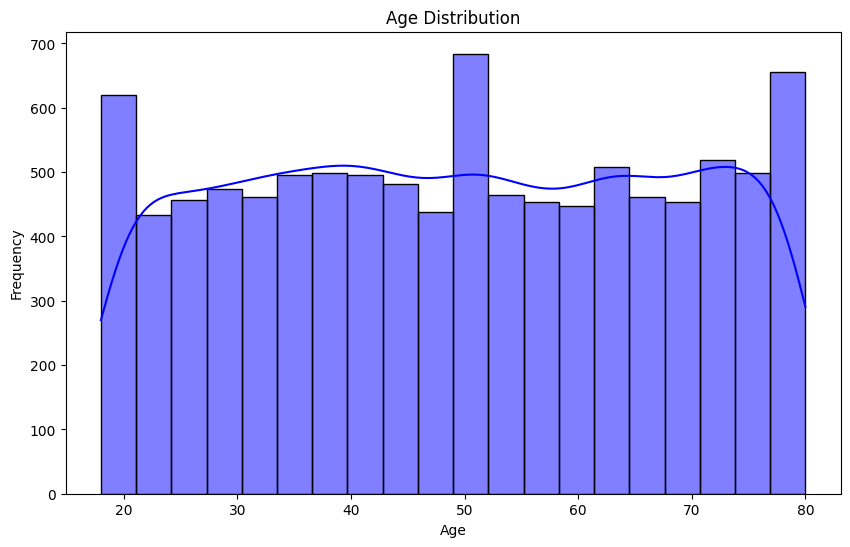

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

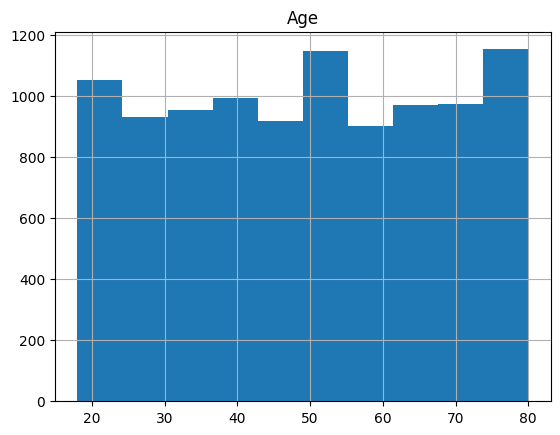

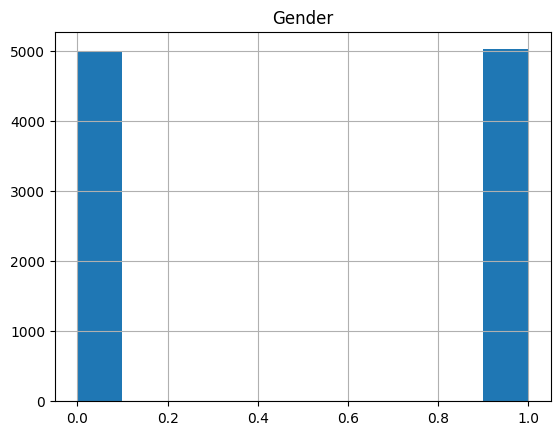

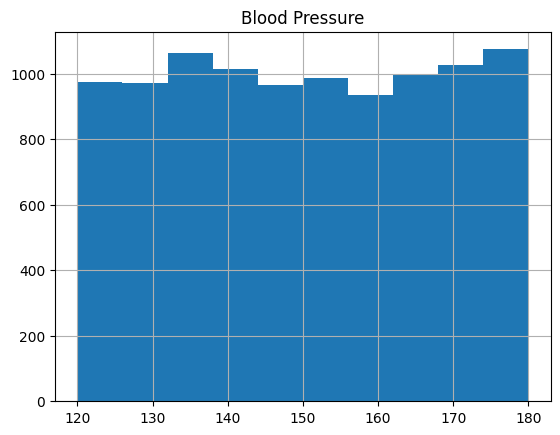

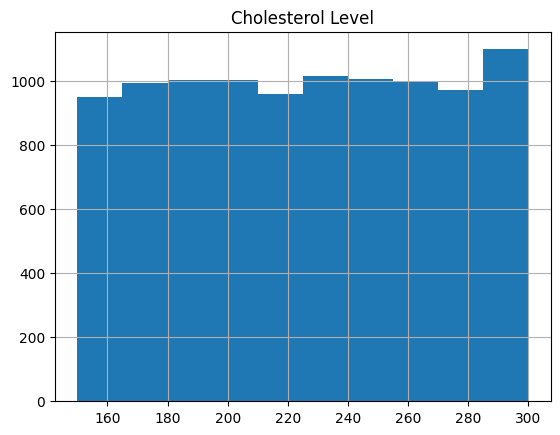

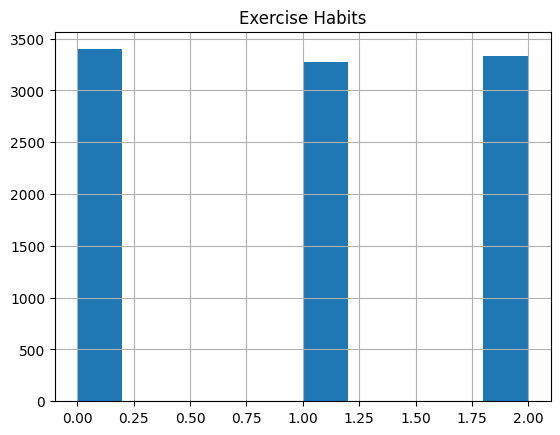

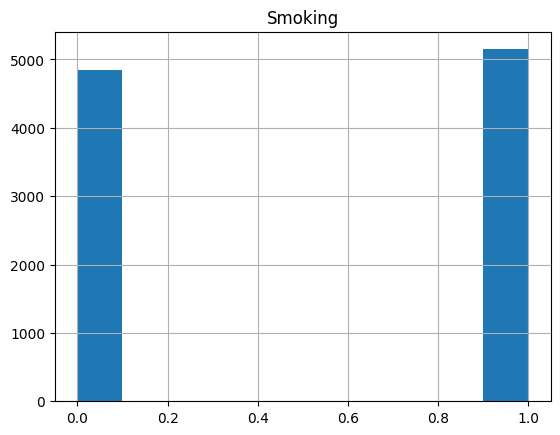

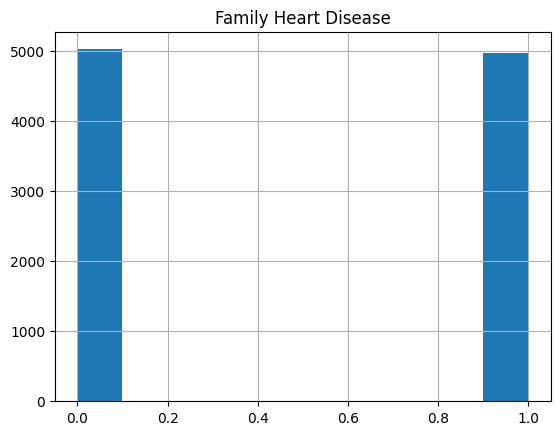

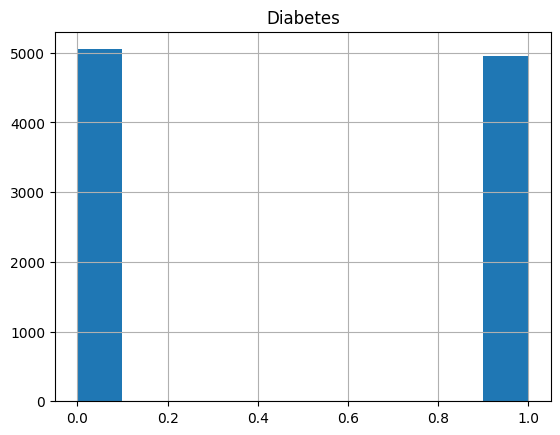

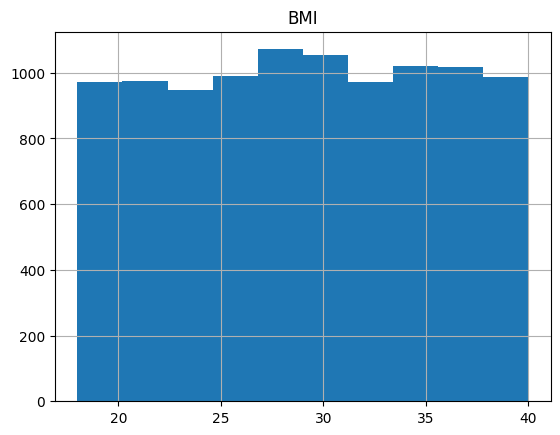

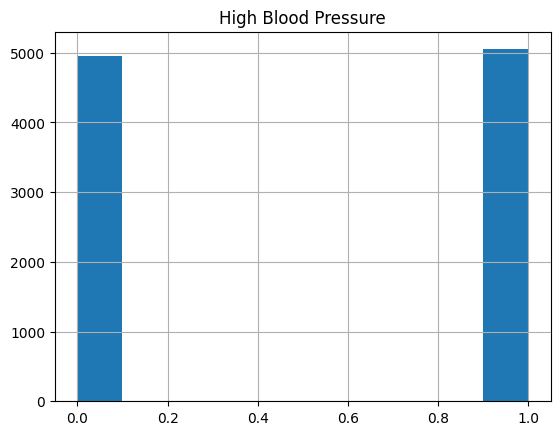

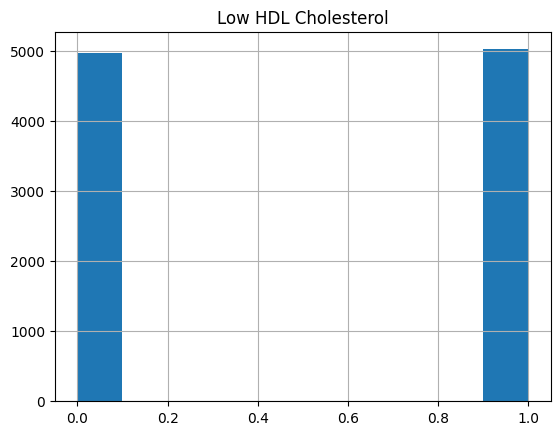

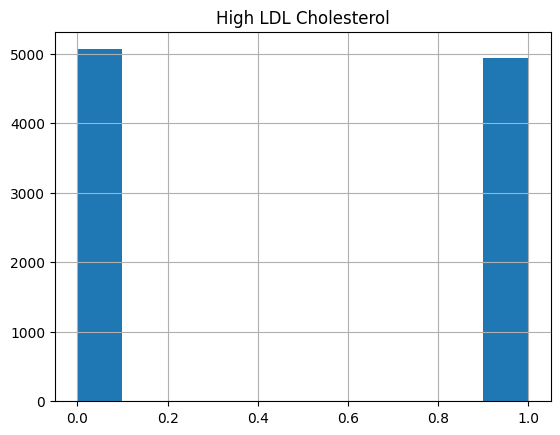

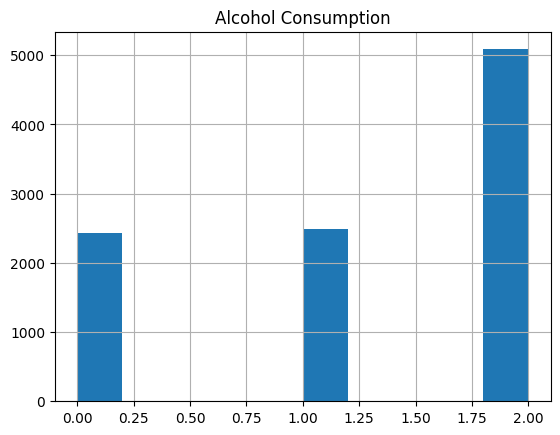

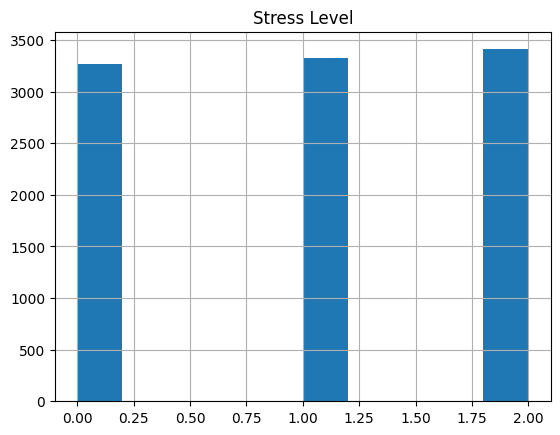

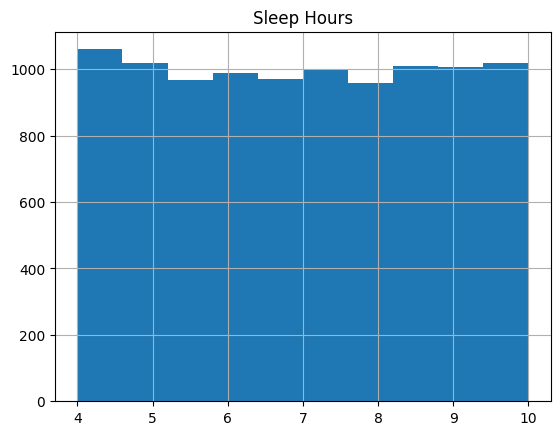

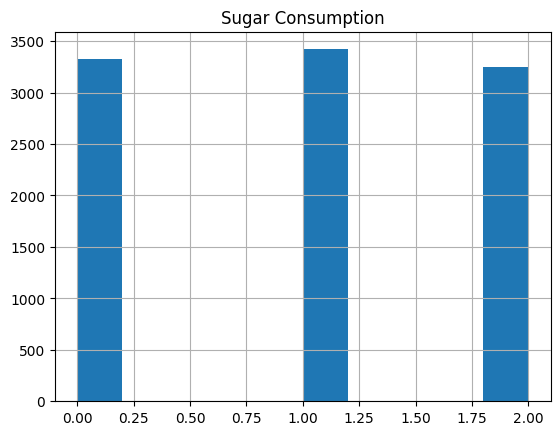

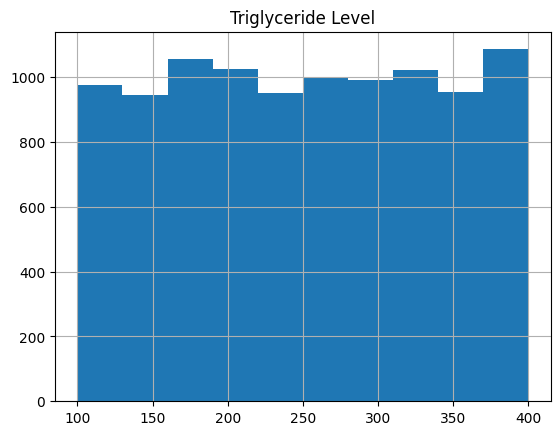

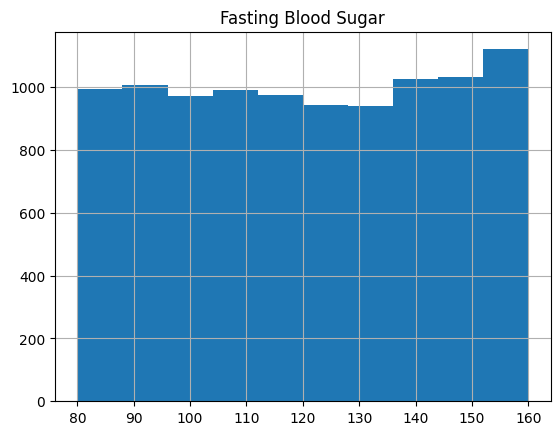

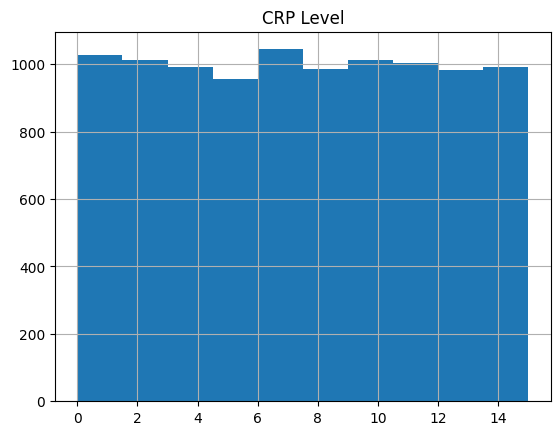

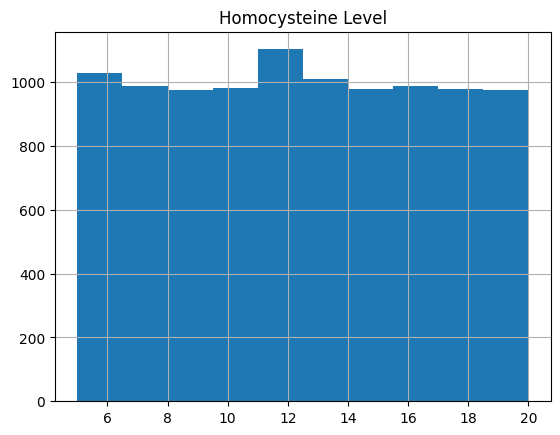

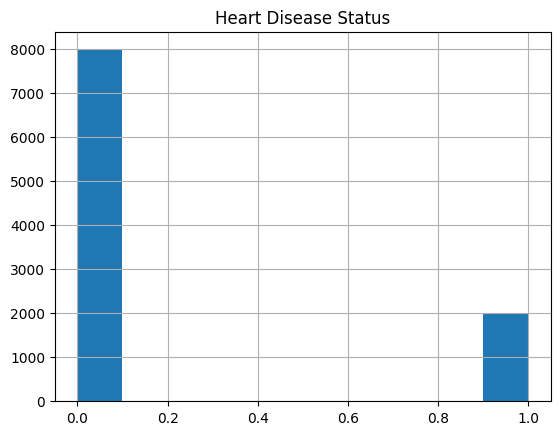

In [14]:
for i in df.select_dtypes(include=['int64', 'float64']).columns:
    df[i].hist()
    plt.title(i)
    plt.show()

In [15]:
#  Handle Outliers
z_thresh = 3
for col in num_cols:
    if col in df.columns:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        df[col] = np.where(z_scores > z_thresh, df[col].mean() + 3 * df[col].std(), df[col])
        df[col] = np.where(z_scores < -z_thresh, df[col].mean() - 3 * df[col].std(), df[col])

In [16]:
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1,153.0,155.0,0,1,1,0,24.991591,1,...,0,0,2,7.633228,2,342.0,120.142213,12.969246,12.387250,0
1,69.0,0,146.0,286.0,0,0,1,1,25.221799,0,...,0,2,0,8.744034,2,133.0,157.000000,9.355389,19.298875,0
2,46.0,1,126.0,216.0,1,0,0,0,29.855447,0,...,1,1,1,4.440440,1,393.0,92.000000,12.709873,11.230926,0
3,32.0,0,122.0,293.0,0,1,1,0,24.130477,1,...,1,1,0,5.249405,0,293.0,94.000000,12.509046,5.961958,0
4,60.0,1,166.0,242.0,1,1,1,1,20.486289,1,...,0,1,0,7.030971,0,263.0,154.000000,10.381259,8.153887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,0,136.0,243.0,2,1,0,0,18.788791,1,...,1,2,0,6.834954,2,343.0,133.000000,3.588814,19.132004,1
9996,38.0,1,172.0,154.0,2,0,0,0,31.856801,1,...,1,2,0,8.247784,1,377.0,83.000000,2.658267,9.715709,1
9997,73.0,1,152.0,201.0,0,1,0,1,26.899911,0,...,1,2,1,4.436762,1,248.0,88.000000,4.408867,9.492429,1
9998,23.0,1,142.0,299.0,1,1,0,1,34.964026,1,...,1,2,0,8.526329,2,113.0,153.000000,7.215634,11.873486,1


In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Train set size: (8000, 20)
Test set size: (2000, 20)


In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [19]:
#  Model Training and Evaluation
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [20]:


# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

In [22]:



# Comparison of Models
print("Accuracy of Random Forest: {:.4f}".format(rf_accuracy))
print("Accuracy of Logistic Regression: {:.4f}".format(log_reg_accuracy))

best_model = ''
# Decide Best Model
if rf_accuracy > log_reg_accuracy:
    best_model = "Random Forest"
elif log_reg_accuracy > rf_accuracy:
    best_model = "Logistic Regression"
else:
    best_model = 'equal'


print(f"\nThe best model for this dataset is: {best_model}")

# Classification Report and Confusion Matrix for the Best Model
if best_model == "Random Forest":
    y_pred = rf_pred
elif best_model == "Logistic Regression":
    y_pred = log_reg_pred
else:
    y_pred = rf_pred


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy of Random Forest: 0.8065
Accuracy of Logistic Regression: 0.8065

The best model for this dataset is: equal

Classification Report:

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1613
           1       0.00      0.00      0.00       387

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000


Confusion Matrix:

[[1613    0]
 [ 387    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
